In [75]:
%%html
<a href="https://colab.research.google.com/drive/1gqWp5Yk3oIQj5BPIMbZMfo9y9cK67PNs">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Glass Classification

This Dataset is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

I will need to use all the columns in this case. I will use a K-NN classification models.

I expected this will be more accuracy since the Glass Identification is phyical. It should be accuraced in order to identify what glass it is.

Attribute Information:

Id number: 1 to 214

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as
are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute)

-- 1 buildingwindowsfloatprocessed 

-- 2 buildingwindowsnonfloatprocessed 

-- 3 vehiclewindowsfloatprocessed

-- 4 vehiclewindowsnonfloatprocessed (none in this database)

-- 5 containers

-- 6 tableware

-- 7 headlamps

Dependent Variable

Type of glass: (class attribute)

buildingwindowsfloatprocessed: 1

buildingwindowsnonfloatprocessed: 2

vehiclewindowsfloatprocessed: 3

vehiclewindowsnonfloatprocessed (none in this database): 4

containers: 5

tableware: 6

headlamps: 7

# Import

In [60]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.


# Loading the Dataset

In [61]:
#Load the dataset I have selected using pandas
file = pd.read_csv("../assignment3/glass.csv")

In [62]:
#Show the head of the data
file.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Cleaning data

In [63]:
#Clean the data using pandas if needed
#Checking Null
file.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [31]:
X = file.drop(columns= ['Type', 'Ca']).values
Y = file.iloc[:, -1].values

# Distributions

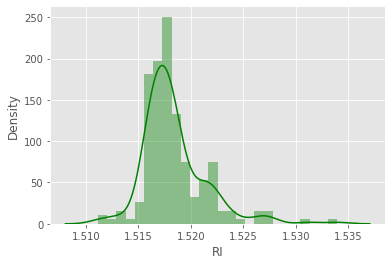

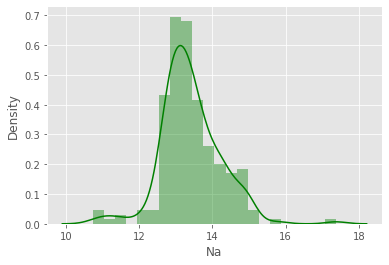

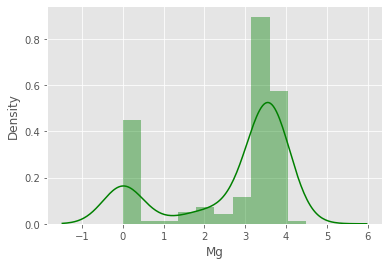

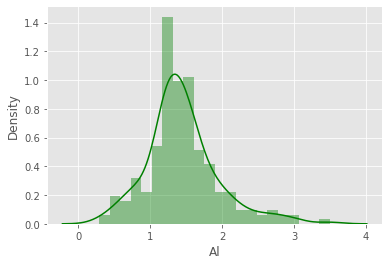

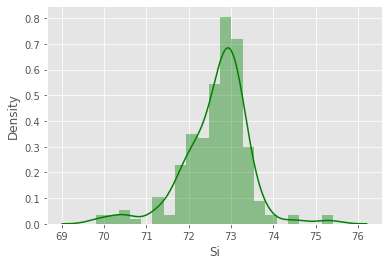

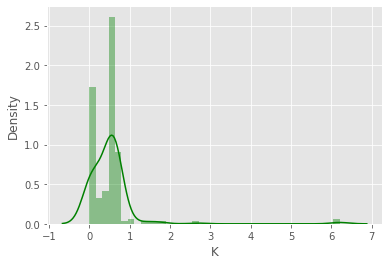

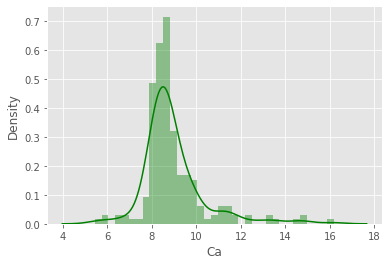

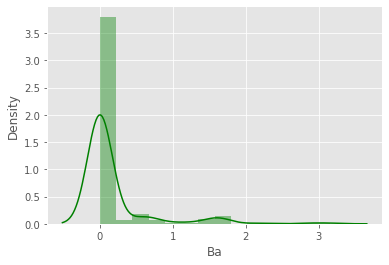

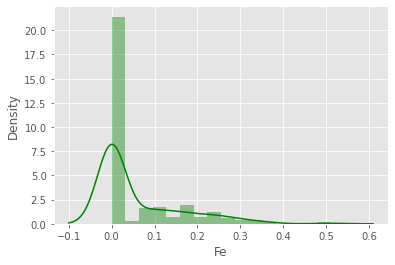

In [65]:
#show each element number of density
for column in file.columns[:-1]:
  sns.distplot(file[column], color= 'g')
  plt.grid(True)
  plt.show()

# Split Train and Test Set

In [66]:
#Split your cleaned dataset using sklearn into a training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
accuracies = {}

# Classification Models - K-NN

In [76]:
#Fit a classifier to your training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

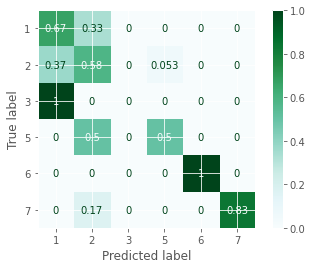

In [68]:
#visualize the classifier on a data plot
plot_confusion_matrix(classifier, X_test, Y_test, cmap = plt.cm.BuGn, normalize = 'true')
plt.show()

In [69]:
#Report on the error rate for your test set
accuracy = accuracy_score(Y_test, Y_pred)
accuracies['K-NN'] = accuracy

print(accuracy)

0.5813953488372093


Comment on the result of this regression. Did it work well or not? Provide justification why or why not.

This is not what I expected beacuse I expected the accuracy will be higher than 80%.

# Conclusion

I am using the glass dataset to find out each type of glass. After that, I use the classification models K-NN to fit into the date and find out the accuracy score with the test and prediction. I found out useing K-NN algorithm cannot maximum the accuracy. I only got 0.58 for K-NN model. I think I should try other model to do it. For example Random Forest, it will be higher accuracy and lower error rate by using this.